# How do we run TARDIS, and how do we make sure it's working well?

> **Note:** We strongly recommend turning off code autocompletion for this notebook. This exercise is designed to engage your understanding of TARDIS convergence and simulation parameters, rather than relying on automated suggestions. In VSCode, you can temporarily disable autocomplete in notebook cells by navigating to **Settings → Notebook: Suggest Enabled** and unchecking the box, or by creating a workspace with a `.vscode/settings.json` file containing `"notebook.suggest.enabled": false`. This will help you focus on understanding the physics behind each step.

In [1]:
from matplotlib import pyplot as plt
from tardis.io.configuration.config_reader import Configuration
from tardis import run_tardis

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

Let's start by running a TARDIS simulation and plotting the spectrum it produces. If we want, we can do this in just two lines. 

**$\blacktriangleright$ TASK**  Execute the cell below to see for yourself.

<div style="background-color: #e3f2fd; border-left: 4px solid #2196f3; padding: 10px; margin: 10px 0;">
<strong>**Note:**</strong> TARDIS is designed to be easy to use. However, as we'll see, just because it runs doesn't mean the results are automatically reliable. We need to check that our simulation has converged properly.
</div>

BokehModel(combine_events=True, render_bundle={'docs_json': {'fa4af7b9-d2df-4386-805e-5bcc26a5e866': {'version…

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

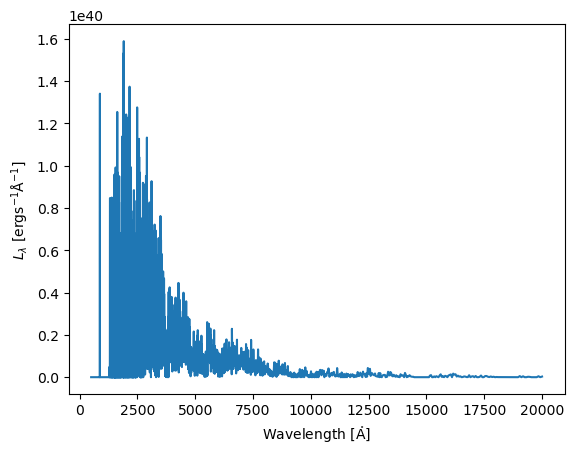

In [2]:
sim = run_tardis(Configuration.from_yaml('tardis_example.yml'))
sim.spectrum_solver.spectrum_virtual_packets.plot()

Great! You've just run your first TARDIS simulation and generated a spectrum. But what are we actually doing and how do we know that it's sensible? 

As we'll discover, just because TARDIS produces output doesn't guarantee that the output is physically meaningful or converged. We need to be critical about our results and check several diagnostics to ensure our simulation is reliable.

Let's start by looking at the inputs to TARDIS and understanding what controls the simulation quality.

## Understanding the Configuration

The code needs a **configuration** object that sets many options in the code. This information gets stored in a dictionary structure. Many more options exist than in the one we'll see here.

**$\blacktriangleright$ TASK** - Before looking at the configuration object below:

1. **Navigate to the `tardis_example.yml` file** in the same directory as this notebook and open it
2. **Scan through the file structure** - what major sections do you see?
3. **Look for parameters related to Monte Carlo** - what settings control the simulation?

**Key parameters to identify:**
- How many iterations does the simulation run?
- How many Monte Carlo packets are used?
- Are there any convergence criteria set?

If you want to know more, you can also take a look at [the configuration documentation here](https://tardis-sn.github.io/tardis/io/configuration/tutorial_read_configuration.html) for a full list of the options that can be set in a configuration file.

# Solution 

The config tells the simulation to run for 4 iterations, with 100 packets, 1000 packets on the last iteration, and convergence criteria set already but not enforced to stop the simulation. 

In [4]:
# Start by navigating around the directory that this notebook is in to find a .yml file, 
# and then take a minute to look at it just to see the structure and some of the fields.
conf = Configuration.from_yaml('tardis_example.yml') 
conf.montecarlo

{'seed': 23111963,
 'no_of_packets': 100.0,
 'iterations': 4,
 'nthreads': 1,
 'last_no_of_packets': 1000.0,
 'no_of_virtual_packets': 5,
 'convergence_strategy': {'type': 'damped',
  'damping_constant': 1.0,
  'threshold': 0.05,
  'fraction': 0.8,
  'hold_iterations': 20,
  't_inner': {'damping_constant': 0.5, 'type': 'damped', 'threshold': 0.05},
  'stop_if_converged': False,
  'lock_t_inner_cycles': 1,
  't_inner_update_exponent': -0.5,
  't_rad': {'damping_constant': 1.0, 'threshold': 0.05, 'type': 'damped'},
  'w': {'damping_constant': 1.0, 'threshold': 0.05, 'type': 'damped'},
  'v_inner_boundary': {'damping_constant': 1.0,
   'threshold': 0.05,
   'type': 'damped'}},
 'virtual_spectrum_spawn_range': {'start': <Quantity 1. Angstrom>,
  'end': <Quantity inf Angstrom>},
 'enable_full_relativity': False,
 'enable_nonhomologous_expansion': False,
 'tracking': {'track_rpacket': False, 'initial_array_length': 10},
 'debug_packets': False,
 'logger_buffer': 1}

### Configuration Analysis

If you've loaded in the file correctly, you'll see that the **configuration** object we got has many more fields and values than the .yml file that we generated it from. There are many default options that come along in TARDIS.

**$\blacktriangleright$ TASK** - Compare the YAML file with the loaded configuration:

Take a look at how the loaded configuration that is ready for TARDIS is different from the YAML we loaded it from. Notice how there are a large number of extra fields with default parameters that we've picked up. 

You can change them all, but they're not all necessary to specify on your own. Feel free to ask us if anything catches your eye, but there are many more options than we'll have time to cover this week.

# Solution

The student should notice a large number of extra fields once the config gets read in. The section above states that too, but it's realy something they should pay attention to if they breeze through the text. 

# Convergence and Packets

### Diagnosing Convergence

**$\blacktriangleright$ TASK** Let's run TARDIS again, but this time we'll ask it to show us convergence plots that will tell us how well the simulation is working.

In [5]:
sim = run_tardis(conf, show_convergence_plots=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'dab0e2d7-39a7-4285-b494-b783bdb38b4d': {'version…

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': '25ed06b0-aa1f-4f93-9129-1478ae9e370a', …

In [6]:
sim.convergence_plots.plasma_plot

FigureWidget({
    'data': [{'type': 'scatter', 'uid': '25ed06b0-aa1f-4f93-9129-1478ae9e370a', 'xaxis': 'x', 'yaxis': 'y'},
             {'type': 'scatter', 'uid': '15105625-00ac-43f6-b7e5-67f82536c245', 'xaxis': 'x2', 'yaxis': 'y2'},
             {'customdata': [<br>Emitted Luminosity: 4.834e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             2.275e+42, <br>Emitted Luminosity:
                             4.834e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 2.275e+42,
                             <br>Emitted Luminosity: 4.834e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             2.275e+42, <br>Emitted Luminosity:
                             4.834e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 2.275e+42,
                             <br>Emitted Luminosity: 4.834e

In [7]:
sim.convergence_plots.t_inner_luminosities_plot 

FigureWidget({
    'data': [{'hovertemplate': '<b>%{y:.3f}</b> at X = %{x:,.0f}<extra>Inner Boundary Temperature</extra>',
              'hovertext': 'text',
              'mode': 'lines',
              'name': 'Inner<br>Boundary<br>Temperature',
              'type': 'scatter',
              'uid': '6ce8b1cd-9869-4279-8e22-ea6a6e1cd65b',
              'x': [1, 2, 3, 4],
              'xaxis': 'x',
              'y': [9000.0, 11161.634323647373, 10921.372966939089,
                    10941.724297289364],
              'yaxis': 'y'},
             {'hovertemplate': '<b>%{y:.4g}</b><br>at X = %{x}<br>',
              'mode': 'lines',
              'name': 'Emitted<br>Luminosity',
              'type': 'scatter',
              'uid': 'd7ab20a8-59b9-4347-ae98-04b11c0310ba',
              'x': [1, 2, 3, 4],
              'xaxis': 'x2',
              'y': [4.8336224917979395e+42, 1.1567298789118057e+43,
                    1.0514246853885563e+43, 1.1319956616416708e+43],
              'yaxis

### Interpreting the Convergence Plots

What's going on here? We see something that looks like a step function, over a velocity range. Recall that TARDIS is built using shells that share a single constant density and temperature, and we see multiple lines because each iteration finds a new set of temperatures to try independently in each shell, based on the amount of energy that flows through it.

Also notice that the first iteration seems pretty isolated and the radiative temperature jumps pretty far away from it after a single iteration. The first iteration is an informed initial guess that TARDIS uses to start the process.

**$\blacktriangleright$ TASK**  Ask yourself, is this simulation converged? Should we trust it, and why or why not?

### Double click this cell to edit it, and then put your thoughts down here



# Solution
The simulation has NOT converged. Evidence: (1) The temperature lines don't overlap between iterations, (2) There's no stable solution, (3) Each iteration shows different temperatures across velocity shells, (4) The first iteration is very different (expected), but subsequent iterations should start converging toward similar values.

### Testing Reproducibility and Stability

So now let's dive in and see if we can improve the simulation to make sure it's arriving at a reasonable plasma solution, and that we can trust the spectrum. Because TARDIS is a Monte Carlo code, it uses a lot of internal random numbers to sample probabilities. Setting the seed explicitly allows for reproducibility to make the random numbers be the same each time.

Let's test this by running the simulation with different seeds and comparing the resulting spectra.

BokehModel(combine_events=True, render_bundle={'docs_json': {'024587e3-cae9-4ec0-a7dc-7f9fafe4fd48': {'version…

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': '2d6e9df5-0dc0-4787-b423-d3d476bd1891', …

BokehModel(combine_events=True, render_bundle={'docs_json': {'05b9cf4f-db62-4123-84ff-3807e03bbfca': {'version…

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': '93c558b5-420b-429f-98c4-e7fe15d2cd18', …

BokehModel(combine_events=True, render_bundle={'docs_json': {'d99fc81f-f9fe-4063-9c20-5e1c641c48ed': {'version…

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': '4a8e7129-3c73-48e0-9b2e-ee81e10a0aea', …

BokehModel(combine_events=True, render_bundle={'docs_json': {'8c9c939e-b389-4e9f-a987-a0fb20c4cc43': {'version…

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': 'b7f3242f-ff20-4dee-a3c9-8a3dd7be3d6b', …

Text(0, 0.5, 'Flux')

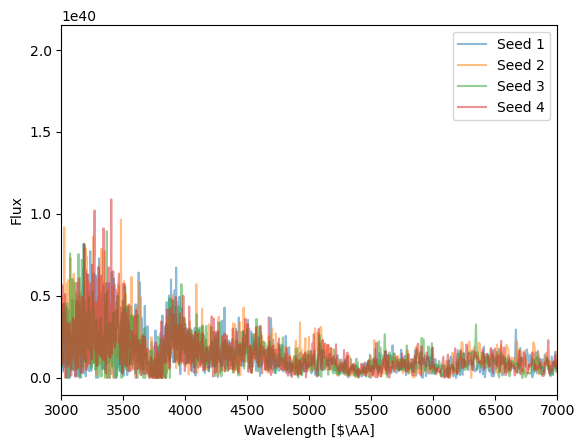

In [8]:
# We can see how the spectrum changes by trying a couple different seeds and seeing if we always get to the same spot. 
# Notice that, after we've loaded in the configuration object we can overwrite any of the values in it in python, 
# rather than having to go back to the .yml each time.

for seed in [1,2,3,4]:

    conf.montecarlo.seed = seed
    sim = run_tardis(conf, show_convergence_plots=True)

    sim.spectrum_solver.spectrum_virtual_packets.plot(alpha=0.5, label=f"Seed {seed}")
    
plt.xlim(3000, 7000)
plt.legend()
plt.xlabel(r'Wavelength [$\AA]')
plt.ylabel('Flux')

### Diagnosing the Problem

That also looks pretty bad. We tried to run TARDIS with a couple different seeds and we can see that we get a pretty different spectrum each time. They follow the same general pattern, but don't really look like one another.

**$\blacktriangleright$ Problem Solving** - Based on what you've observed so far:

1. **What evidence do we have** that the simulation isn't working well?
2. **What are the possible causes** of poor convergence in a Monte Carlo simulation?
3. **What parameters might we adjust** to improve the situation?

**Hint:** Think about the two main resources in a Monte Carlo simulation: time (iterations) and sampling (packets).

# Solution
The different spectra indicate poor Monte Carlo sampling. Possible issues: (1) Too few packets (no_of_packets) leading to statistical noise, (2) Too few iterations allowing insufficient time for convergence, (3) The plasma state depends on packet interactions, so poor sampling gives inconsistent plasma conditions, (4) We need to increase both packet number and iterations for stable results.

Let's start by making sure that TARDIS is converging to a stable plasma solution. One of the easiest things we can do is give TARDIS more iterations so that it has more time to move towards a stable solution.

**$\blacktriangleright$ Explore First** - Look at the Monte Carlo configuration below and identify:

1. **How many iterations** is the simulation currently set to run?
2. **How many packets** are being used per iteration?

In [9]:
conf.montecarlo

{'seed': 4,
 'no_of_packets': 100.0,
 'iterations': 4,
 'nthreads': 1,
 'last_no_of_packets': 1000.0,
 'no_of_virtual_packets': 5,
 'convergence_strategy': {'type': 'damped',
  'damping_constant': 1.0,
  'threshold': 0.05,
  'fraction': 0.8,
  'hold_iterations': 20,
  't_inner': {'damping_constant': 0.5, 'type': 'damped', 'threshold': 0.05},
  'stop_if_converged': False,
  'lock_t_inner_cycles': 1,
  't_inner_update_exponent': -0.5,
  't_rad': {'damping_constant': 1.0, 'threshold': 0.05, 'type': 'damped'},
  'w': {'damping_constant': 1.0, 'threshold': 0.05, 'type': 'damped'},
  'v_inner_boundary': {'damping_constant': 1.0,
   'threshold': 0.05,
   'type': 'damped'}},
 'virtual_spectrum_spawn_range': {'start': <Quantity 1. Angstrom>,
  'end': <Quantity inf Angstrom>},
 'enable_full_relativity': False,
 'enable_nonhomologous_expansion': False,
 'tracking': {'track_rpacket': False, 'initial_array_length': 10},
 'debug_packets': False,
 'logger_buffer': 1}

### **TASK**: Increase the Number of Iterations

Based on your analysis, let's try to fix the convergence problem. First, let's give TARDIS more iterations to reach a stable solution.

In [ ]:
# Your code here - increase the number of iterations
conf.montecarlo.iterations = ?

# Run the simulation
sim = run_tardis(conf, show_convergence_plots=True)

# Display the convergence plot
sim.convergence_plots.plasma_plot

In [10]:
# Solution
conf.montecarlo.iterations = 15  # Increase from default 4 to 15
sim = run_tardis(conf, show_convergence_plots=True)
sim.convergence_plots.plasma_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'ab0e44d0-2c91-4583-819e-fc64156f8aea': {'version…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': '36a90654-1ea5-47e9-8dcc-993bbdedb10e', …

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

FigureWidget({
    'data': [{'type': 'scatter', 'uid': '36a90654-1ea5-47e9-8dcc-993bbdedb10e', 'xaxis': 'x', 'yaxis': 'y'},
             {'type': 'scatter', 'uid': '50b2cd51-1aba-4c91-a268-8dfc83233eac', 'xaxis': 'x2', 'yaxis': 'y2'},
             {'customdata': [<br>Emitted Luminosity: 5.205e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             1.92e+42, <br>Emitted Luminosity:
                             5.205e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 1.92e+42,
                             <br>Emitted Luminosity: 5.205e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             1.92e+42, <br>Emitted Luminosity:
                             5.205e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 1.92e+42,
                             <br>Emitted Luminosity: 5.205e+42<

### Analyzing the Results

Interesting. It still doesn't look like we're getting to a stable solution.

**$\blacktriangleright$ Analyze** - Look at the new convergence plot:

1. **What changed** compared to the previous run with fewer iterations?
2. **Is the simulation any closer to convergence?** What evidence supports your answer?
3. **What might this tell us** about the root cause of the problem?

**Think about it:** If more iterations don't help, what else could be the issue?

Well, we know that TARDIS is a Monte Carlo code, and that it learns everything it needs to about the plasma by keeping track of how the packets interact with and move through the ejecta. Maybe we're not using enough packets in our simulation?

# Solution
More iterations alone likely didn't solve the problem. The convergence is still poor because we don't have enough Monte Carlo packets to properly sample the radiation field. We need to increase `no_of_packets` to get better statistics and reduce noise in the plasma calculation.

## **$\blacktriangleright$ TASK: Increase the number of packets**

Now let's address the Monte Carlo sampling issue. TARDIS learns about the plasma state by tracking how packets interact with the ejecta. With too few packets, the statistics are poor and the results are noisy. We can also run even more packets on the very final iteration since that's the one we use to track the detailed radiation field and form the spectrum. 

In [ ]:
# Your code here - increase the number of packets
conf.montecarlo.no_of_packets = ?
conf.montecarlo_last_no_of_packets = ?

# Run the simulation
sim = run_tardis(conf, show_convergence_plots=True)

# Display the convergence plot
sim.convergence_plots.plasma_plot

In [11]:
# Solution
conf.montecarlo.no_of_packets = 1e4  # Increase from 1e3 to 1e4 (10x more)
conf.montecarlo.last_no_of_packets = 1e5
sim = run_tardis(conf, show_convergence_plots=True)
sim.convergence_plots.plasma_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'caf3cc27-27bb-4220-84b0-725e728dda4c': {'version…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': '6e4e7cc7-20bf-4762-a2d1-d006fd3cc892', …

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

FigureWidget({
    'data': [{'type': 'scatter', 'uid': '6e4e7cc7-20bf-4762-a2d1-d006fd3cc892', 'xaxis': 'x', 'yaxis': 'y'},
             {'type': 'scatter', 'uid': 'be0d3b21-226b-4e28-a6b1-b6faecdfc968', 'xaxis': 'x2', 'yaxis': 'y2'},
             {'customdata': [<br>Emitted Luminosity: 5.234e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             1.889e+42, <br>Emitted Luminosity:
                             5.234e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 1.889e+42,
                             <br>Emitted Luminosity: 5.234e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             1.889e+42, <br>Emitted Luminosity:
                             5.234e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 1.889e+42,
                             <br>Emitted Luminosity: 5.234e

### Success! But Can We Do Better?

Much better! It seems like the radiative temperature reaches a place that it settles down and stays! In fact, now you might have more iterations than you actually need! And on top of that, the simulation took a lot longer to run this time.

**$\blacktriangleright$ Optimization Challenge** - Now we face a new problem:

1. **Trade-offs:** We achieved convergence, but at what cost? How much longer did the simulation take?
2. **Over-engineering:** Do we really need all those iterations if the solution converges earlier?
3. **Efficiency:** How can we be smart about balancing computational cost and solution quality?

Let's try to be clever and strike a good balance between computation time and a stable solution. This is especially helpful if you want to run your own simulation, and you don't want to hand-tune convergence parameters like we're doing here.

**The Solution:** You can tell TARDIS to check if certain parameters have converged, and to make sure that they are stable for a set number of iterations before stopping and proceeding to the final iteration.

### **TASK**: Implement Automatic Convergence

**$\blacktriangleright$ Set Up Automatic Convergence** - Let's set up TARDIS to automatically detect convergence:

1. **Understand the parameters:**
   - `stop_if_converged = True`: Tells TARDIS to stop when convergence criteria are met
   - `hold_iterations`: How many consecutive iterations must meet the criteria before stopping

2. **Choose your strategy:** How many consecutive converged iterations would give you confidence?

In [ ]:
conf.montecarlo...
conf.montecarlo...

sim = run_tardis(conf, show_convergence_plots=True)
sim.convergence_plots.plasma_plot

In [12]:
# Solution
conf.montecarlo.convergence_strategy.stop_if_converged = True
conf.montecarlo.convergence_strategy.hold_iterations = 4  # Require 4 consecutive stable iterations

sim = run_tardis(conf, show_convergence_plots=True)
sim.convergence_plots.plasma_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'f767c8ab-7796-4fc2-b578-5144fc3a0e32': {'version…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': '5f02615a-f84b-4d15-9e51-fdca19e41ea6', …

FigureWidget({
    'data': [{'type': 'scatter', 'uid': '5f02615a-f84b-4d15-9e51-fdca19e41ea6', 'xaxis': 'x', 'yaxis': 'y'},
             {'type': 'scatter', 'uid': 'c01cdb36-df5a-473f-ae4c-9ca52393a0ba', 'xaxis': 'x2', 'yaxis': 'y2'},
             {'customdata': [<br>Emitted Luminosity: 5.234e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             1.889e+42, <br>Emitted Luminosity:
                             5.234e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 1.889e+42,
                             <br>Emitted Luminosity: 5.234e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             1.889e+42, <br>Emitted Luminosity:
                             5.234e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 1.889e+42,
                             <br>Emitted Luminosity: 5.234e

In [13]:
sim.convergence_plots.t_inner_luminosities_plot

FigureWidget({
    'data': [{'hovertemplate': '<b>%{y:.3f}</b> at X = %{x:,.0f}<extra>Inner Boundary Temperature</extra>',
              'hovertext': 'text',
              'mode': 'lines',
              'name': 'Inner<br>Boundary<br>Temperature',
              'type': 'scatter',
              'uid': '986fac2b-5b7b-46e3-ae33-5928cc50ff74',
              'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'xaxis': 'x',
              'y': [9000.0, 10901.582793720514, 10785.092654185333,
                    10797.790256959679, 10791.263377038451, 10796.63024522411,
                    10783.986031483977, 10790.978319414833, 10788.094390122285],
              'yaxis': 'y'},
             {'hovertemplate': '<b>%{y:.4g}</b><br>at X = %{x}<br>',
              'mode': 'lines',
              'name': 'Emitted<br>Luminosity',
              'type': 'scatter',
              'uid': '011c5bd4-e900-4fca-afaf-089f8352ba56',
              'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13

### Final Spectrum Assessment

Now let's take one more look at the spectrum to see how it looks with our improved convergence.

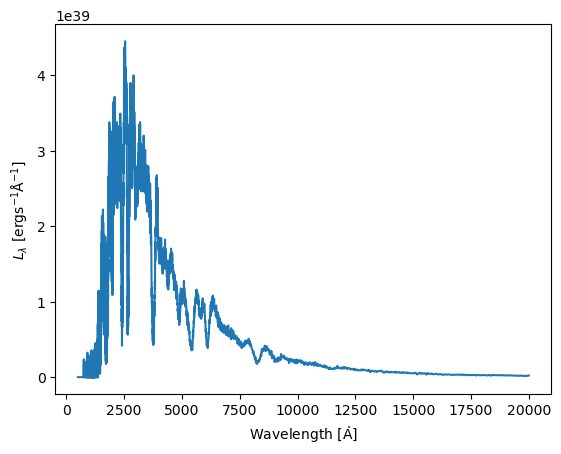

In [14]:
sim.spectrum_solver.spectrum_virtual_packets.plot()

### Excellent Work! Key Lessons Learned

Your final spectrum should look much less noisy than what you saw at the beginning of the notebook. You've successfully diagnosed and fixed convergence problems in a Monte Carlo radiative transfer simulation!

**Critical takeaways:**
- **Always check convergence** - TARDIS will produce output even if it hasn't converged
- **Monitor multiple diagnostics** - plasma plots, luminosity plots, spectrum consistency
- **Balance accuracy vs. computational cost** - more packets and iterations improve results but take longer
- **Use automatic convergence** - let TARDIS determine when it's done rather than guessing

### **Final Reflection Questions:**

1. **Computational Trade-offs:** You increased both iterations and packet number. How would you decide on optimal values for a new simulation?

2. **Physical Insight:** Why is convergence particularly important for supernova simulations? What could go wrong if you used an unconverged model for scientific analysis?

3. **Diagnostic Strategy:** If you encountered convergence problems in the future, what would be your systematic approach to diagnosing and fixing them?

You can also see [the TARDIS documentation on convergence](https://tardis-sn.github.io/tardis/physics/update_and_conv/update_and_conv.html) for more advanced convergence strategies and diagnostics.

Congratulations on making it to the end of this notebook! You've successfully learned how to diagnose and fix convergence problems in TARDIS simulations. 

Take a small breather and review as much as you want. After the break, we'll go on to the next notebook: **`tardis_intro_morning_2_tardis_plasma.ipynb`**

In [15]:
from IPython import get_ipython
from pathlib import Path
ip = get_ipython()
path = None
if '__vsc_ipynb_file__' in ip.user_ns:
    path = ip.user_ns['__vsc_ipynb_file__']

nb_path = Path(path)
# Get the current notebook name
current_notebook = nb_path.name

# Create the student version by replacing 'instructor' with 'student'
output_notebook = current_notebook.replace('instructor', 'student')

# Run the nbconvert command
!jupyter nbconvert {current_notebook} --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="['solution']" --to notebook --output {output_notebook}

print(f"Converted {current_notebook} to {output_notebook}")


[NbConvertApp] Converting notebook 1_tardis_convergence_instructor.ipynb to notebook
[NbConvertApp] Writing 268061 bytes to 1_tardis_convergence_student.ipynb
Converted 1_tardis_convergence_instructor.ipynb to 1_tardis_convergence_student.ipynb
